In [1]:
import pandas as pd
from pandas import *  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

file=r'C:\Users\umut\Desktop\CS210 proje\cs210projectdatas\datas22.csv'
data_education=pd.read_csv(file, sep=';')
data_education_NoMissing=data_education.drop(data_education.columns[1:4], axis=1)
data_education_NoMissing=data_education_NoMissing.drop(data_education_NoMissing.columns[2:], axis=1)
data_education_NoMissing=data_education_NoMissing.dropna()
data_education_NoMissing.rename(columns={"LOCATION":"Country","Education Rate":"EducationRate"}, inplace=True)
data_education_NoMissing.index=list(range(len(data_education_NoMissing)))
data_education_NoMissing.index


file1=r'C:\Users\umut\Desktop\CS210 proje\cs210projectdatas\WomanViolence.csv'
data_violence=pd.read_csv(file1, sep=';')
data_violence=data_violence.drop(['TIME'] , axis=1)
data_violence_NoMissing=data_violence.dropna()
data_violence_NoMissing.rename(columns={"LOCATION":"Country","Rate":"ViolenceRate"}, inplace=True)
data_violence_NoMissing.index=list(range(len(data_violence_NoMissing)))
data_violence_NoMissing.index
data= pd.merge(left=data_education_NoMissing, right=data_violence_NoMissing , on=['Country'] , how= 'left')


file2=r'C:\Users\umut\Desktop\CS210 proje\cs210projectdatas\ER2.csv'
data_er=pd.read_csv(file2,sep = ';')
data1=pd.merge(left=data , right = data_er,on=['Country'] , how= 'left')
data1=data1.drop(['Country'],axis=1)
data1=data1.dropna()
columnsTitles=["EducationRate","GDPpercapita","ViolenceRate"]
data1=data1.reindex(columns=columnsTitles)
data1=data1.reset_index(drop=True)
data1

,EducationRate,GDPpercapita,ViolenceRate
0,106.3,51733.481920,4
1,80.7,14139.269430,6
2,97.2,5045.769926,11
3,71.0,57543.669060,7
4,63.2,1740.915011,20
5,60.0,5943.034472,9
6,73.4,4855.800481,7
7,60.8,12806.565110,14
8,30.0,3461.781164,16
9,91.8,97199.919100,9


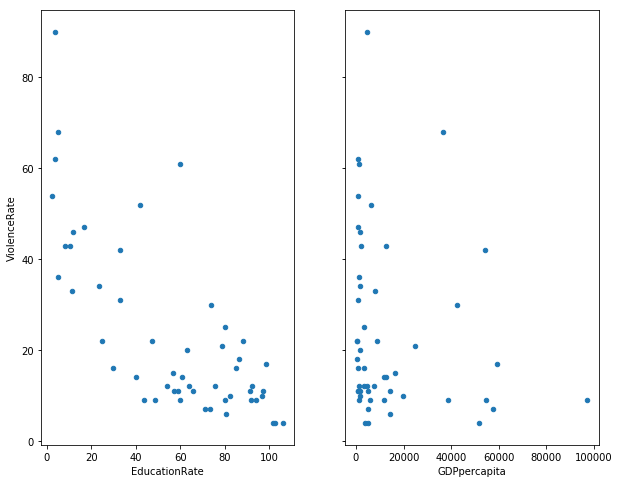

In [2]:
trainData = data1[:52]
features = trainData.values[:, :2]
targetarray = trainData.values[:, 2:]

testData = data1[52:]
t_features = testData.values[:,:2]
t_targetarray = testData.values[:,2:]

fig, axs = plt.subplots(1, 2, sharey=True) 
trainData.plot(kind='scatter', x='EducationRate', y='ViolenceRate', ax=axs[0], figsize=(10, 8))
trainData.plot(kind='scatter', x='GDPpercapita', y='ViolenceRate', ax=axs[1])

In [3]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='ViolenceRate ~ EducationRate', data=trainData).fit()
lm.params

Intercept        48.997949
EducationRate    -0.445282
dtype: float64

In [4]:
48.997949 + (-0.445282)*73.4    #As an example we choosed Italy

16.314250199999996

In [5]:
X_new = pd.DataFrame({'EducationRate': [73.4]})
X_new.head()

,EducationRate
0,73.4


In [6]:
lm.predict(X_new)

0    16.314218
dtype: float64

In [7]:
X_new = pd.DataFrame({'EducationRate': [trainData.EducationRate.min(), trainData.EducationRate.max()]})
X_new.head()

,EducationRate
0,2.5
1,106.3


In [8]:
preds = lm.predict(X_new)
preds

0    47.884743
1     1.664426
dtype: float64

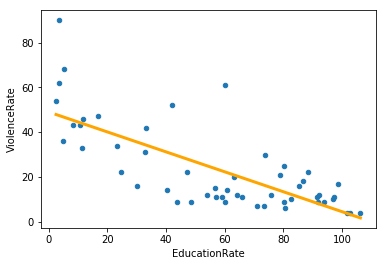

In [9]:
trainData.plot(kind='scatter', x='EducationRate', y='ViolenceRate') #Plot Observed data
plt.plot(X_new, preds, c='orange', linewidth=3)                     #Plot least squares line

In [10]:
lm.conf_int()

,0,1
Intercept,41.462175,56.533724
EducationRate,-0.560415,-0.330150


In [11]:
lm.pvalues

Intercept        9.770729e-18
EducationRate    3.802296e-10
dtype: float64

In [12]:
lm.rsquared

0.5468778921824813

In [13]:
lm = smf.ols(formula='ViolenceRate ~ EducationRate + GDPpercapita', data=trainData).fit()
lm.params

Intercept        48.803631
EducationRate    -0.459610
GDPpercapita      0.000072
dtype: float64

In [14]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ViolenceRate   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     30.23
Date:                Mon, 21 May 2018   Prob (F-statistic):           2.80e-09
Time:                        01:42:42   Log-Likelihood:                -206.37
No. Observations:                  52   AIC:                             418.7
Df Residuals:                      49   BIC:                             424.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        48.8036      3.775     12.928      0.000      41.217      56.390
EducationRate    -0.4596      0.060     -7.605      0.000      -0.581      -0.338
GDPpercapita   7.241e-05   9.33e-05      0.776      0.441      -0.000       0.000
==============================================================================
Omnibus:                       15.941   Durbin-Watson:                   1.773
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.796
Skew:                           1.135   Prob(JB):                     5.03e-05
Kurtosis:                       4.996   Cond. No.                     5.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
lm = smf.ols(formula='ViolenceRate ~ EducationRate', data=trainData).fit()
lm.rsquared

0.5468778921824813

In [16]:
lm = smf.ols(formula='ViolenceRate ~ EducationRate + GDPpercapita', data=trainData).fit()
lm.rsquared

0.5523799400521094